# Pytorch | Computer Vision | Dataset Fashion MINIST

## In this I make computer vision model for MINIST
- This is not good model because i use only linear layers.
- This is only for study purpose and check.

### Step 1 : Import Necessary Import

In [37]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

### Device Agnostic code
This code ensure if GPU is present it will gpu otherwise use CPU

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Step 2: Get the Data MINIST Dataset | Download from pytorch inbuild datsets

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

#### 2.1 Check Train Sample
**Note:** In this sample example last digit you see is label which denoted by integer. 

In [40]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

#### 2.2 Check the shape of the image
**Note:** Check what shape image follow NCHW or NHWC
where 
- N = Number of color images
- C = No. of color channel
- H = Height
- W = Width


In [41]:
image.shape

torch.Size([1, 28, 28])

[1, 28, 28] Where `[ color_channels=1, height=28, width=28]`

#### 2.3 Check number of samples

In [42]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

#### 2.4 Check are different classes Avilable as per interge in image data

In [43]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### 2.5 Visualize Our data

Image Shape : torch.Size([1, 28, 28])


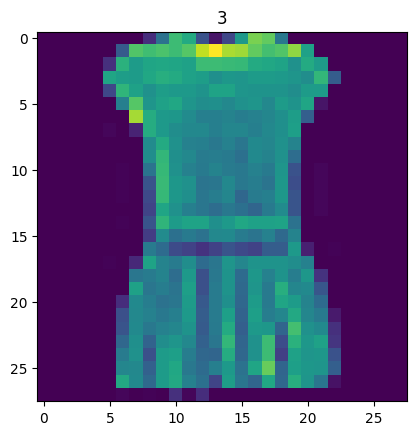

In [44]:
import matplotlib.pyplot as plt
image, label = train_data[3]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

#### 2.6 Change the image into grayscale

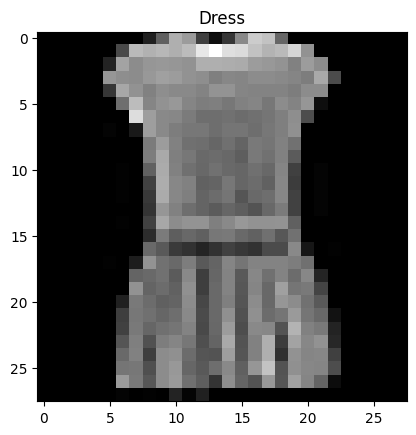

In [45]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

#### 2.7 Check more images

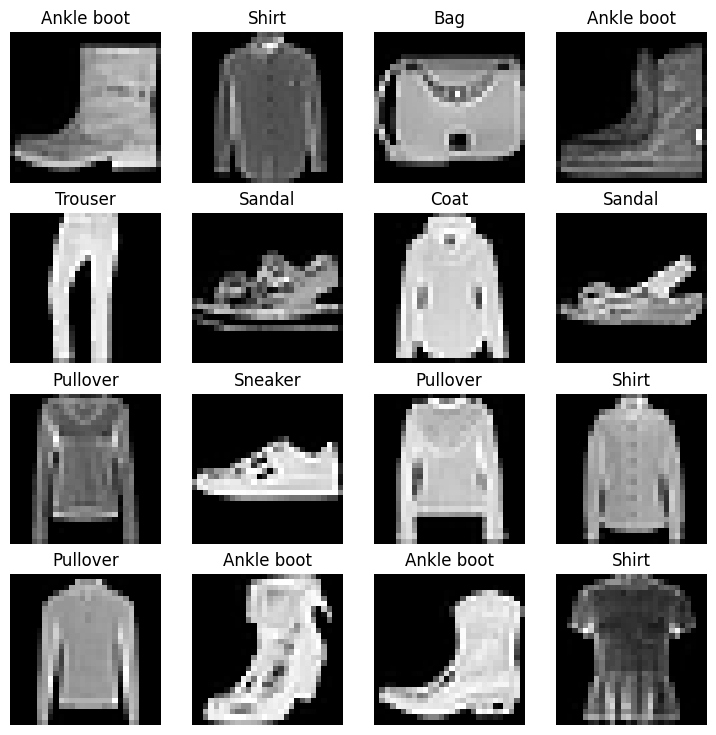

In [46]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False);

### Step 3: Prepare DataLoader
- It turns large Dataset into a python iterable of smaller chunks called batches or mini-batches.
- batches are set by batch_size
- Common pratices are using thb batch size power of 2 like 32, 64, 128 etc.


In [47]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             )

print(f"Dataloaders : {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x000001CE4BC57B10>, <torch.utils.data.dataloader.DataLoader object at 0x000001CE49F7BCE0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


#### 3.1 Check Out Inside training dataloader

In [48]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

#### 3.2 Checkout the Sample

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


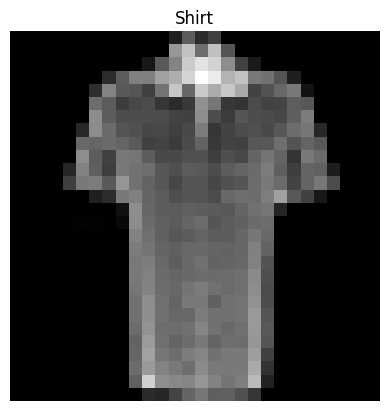

In [49]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Step 4 : Build a baseline model

#### 4.1 Compress the dimensions of a tensor into a single vector using `nn.Flatten()`

In [50]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


#### 4.2 Create Baseline Model Class { With Linearity }

In [51]:
from torch import nn
class FashionMNISTModelLinear(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [52]:
torch.manual_seed(42)

model_linear = FashionMNISTModelLinear(
        input_shape=784,
        hidden_units=10,
        output_shape=len(class_names)
)
model_linear.to("cpu")

FashionMNISTModelLinear(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Step 5: Setup loss, Optimizer and evaluation metrics

In [53]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [54]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_linear.parameters(), lr=0.1)

### Optional : Time for check the timing during training

In [55]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Step 6: Creating a Training Loop

In [56]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_linear.train() 

        # 1. Forward pass
        y_pred = model_linear(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_linear.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_linear(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) 

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
 
train_time_end_on_cpu = timer()
total_train_time_model_linear = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_linear.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:09<00:19,  9.71s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:19<00:09,  9.60s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:28<00:00,  9.60s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 28.807 seconds


### Step 7 : Evaluate the Model Linear results

In [57]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) 
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}

model_linear_results = eval_model(model=model_linear, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)

model_linear_results

{'model_name': 'FashionMNISTModelLinear',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### Step 8: Make Preidcition 

In [58]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [59]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) 

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 

            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

pred_probs= make_predictions(model=model_linear, 
                             data=test_samples)


print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

pred_probs[:2]

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


tensor([[4.4459e-08, 6.3134e-08, 3.4539e-08, 2.4900e-08, 2.0237e-08, 8.9550e-01,
         1.7275e-07, 1.6880e-03, 1.8719e-05, 1.0279e-01],
        [4.1279e-02, 4.1940e-03, 3.0449e-03, 9.0764e-01, 3.8841e-02, 2.8370e-08,
         4.5034e-03, 3.2471e-06, 4.9072e-04, 4.5357e-07]])

In [60]:

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

#### 8.1 Plot predictions

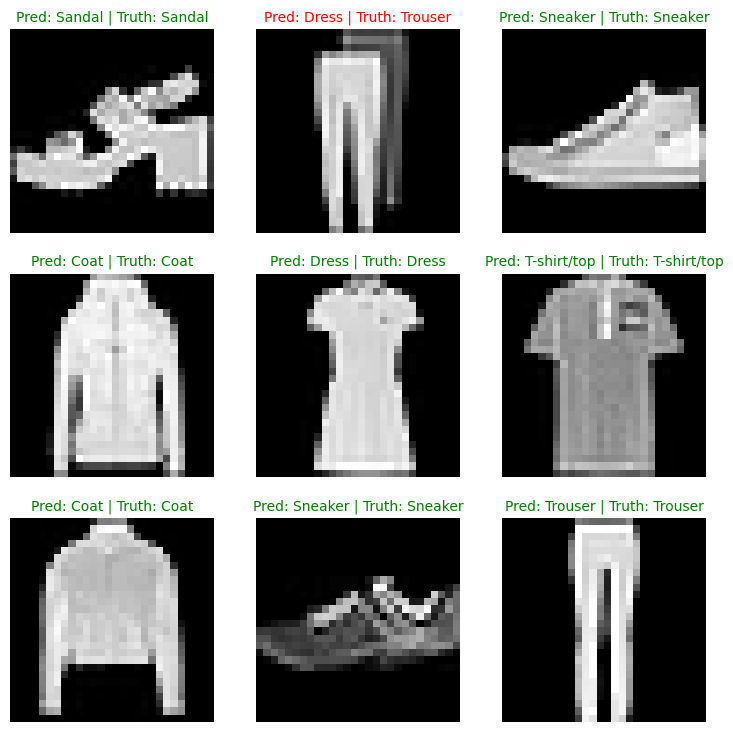

In [61]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") 
  else:
      plt.title(title_text, fontsize=10, c="r") 
  plt.axis(False);

#### 8.2 Making a confusion matrix for further prediction evaluation

In [62]:
from tqdm.auto import tqdm

y_preds = []
model_linear.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_linear(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 272.03it/s]


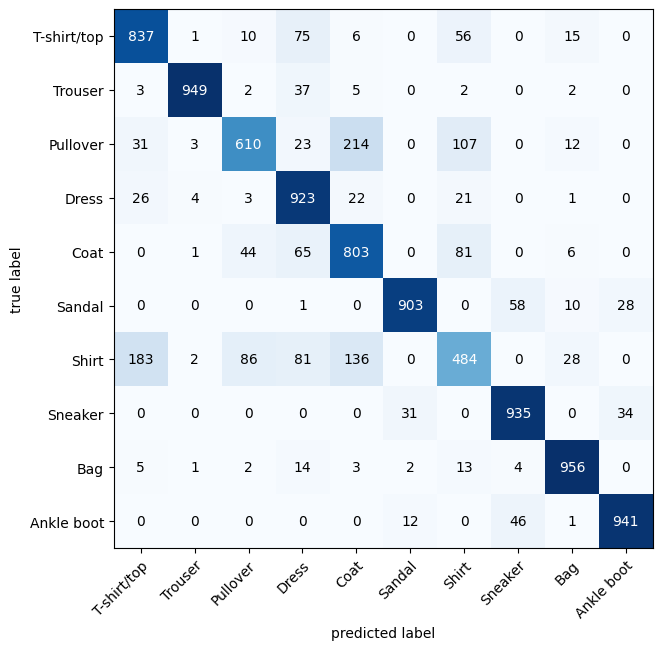

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names, 
    figsize=(10, 7)
);

### Step 9:  Save and load best performing model

In [64]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_linear.pth" 
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

checkpoint = {
    "model_state_dict": model_linear.state_dict(),
    "model_results": model_linear_results,  
    # "epoch": epoch,                 # Optional: Add other training info
    # "optimizer_state_dict": optimizer.state_dict(), 
}

print(f"Saving model and results to: {MODEL_SAVE_PATH}")
torch.save(obj=checkpoint, f=MODEL_SAVE_PATH)

Saving model and results to: models\model_linear.pth


In [65]:
# 1. Load the entire saved checkpoint dictionary
loaded_checkpoint = torch.load(f=MODEL_SAVE_PATH)

# 2. Load the model's state_dict 
loaded_model_linear = FashionMNISTModelLinear(input_shape=784,
                                        hidden_units=10, 
                                        output_shape=len(class_names))

loaded_model_linear.load_state_dict(loaded_checkpoint["model_state_dict"])
loaded_model_linear.to(device)

# 3. Load the results dictionary!
loaded_model_results_dict = loaded_checkpoint["model_results"] 

# 4. Access the loss value successfully!
loaded_loss = loaded_model_results_dict["model_loss"] 

print(f"Loaded Loss: {loaded_loss}")

Loaded Loss: 0.47663894295692444


In [ ]:
model_linear_results

{'model_name': 'FashionMNISTModelLinear',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

##### 9.1 Compare teh saved loaded model loss with original loss

In [67]:

torch.isclose(torch.tensor(model_linear_results["model_loss"]), 
              torch.tensor(loaded_loss),
              atol=1e-08, 
              rtol=0.0001) 

tensor(True)

### Step 10: Use your model
- Load the saved model.
- Do atleast 1 prediction with 1 image from test data with load model
- Plot the image you want to predict.

In [68]:
## Load the model
loaded_checkpoint = torch.load(f=MODEL_SAVE_PATH)

loaded_model_linear = FashionMNISTModelLinear(input_shape=784,
                                        hidden_units=10, 
                                        output_shape=len(class_names))

loaded_model_linear.load_state_dict(loaded_checkpoint["model_state_dict"])
loaded_model_linear.to(device)

loaded_model_results_dict = loaded_checkpoint["model_results"] 

Image Shape : torch.Size([1, 28, 28])


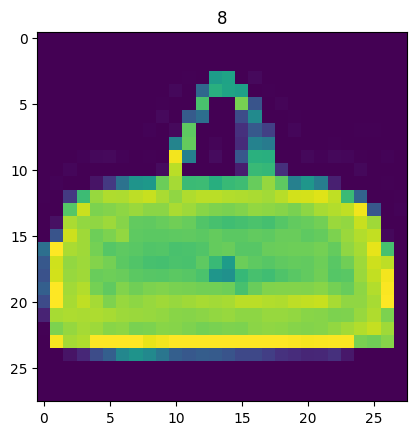

In [69]:
test_samples = []
test_samples.append(test_data[62])

image, label = test_data[62]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);


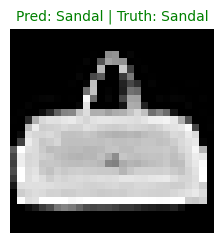

In [70]:
plt.figure(figsize=(9, 9))
for i, sample in enumerate(test_samples):
  
  image, label = sample
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(image.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r") 
  plt.axis(False);

In [71]:
def make_predictions_linear(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            image, label = sample
            sample = torch.unsqueeze(image, dim=0).to(device) 
            sample = sample.flatten(start_dim=1) 
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [72]:
pred_probs_loaded_model = make_predictions_linear(model = loaded_model_linear,
                              data=test_samples)
pred_classes_loaded = pred_probs_loaded_model.argmax(dim=1)
pred_classes_loaded


tensor([8])

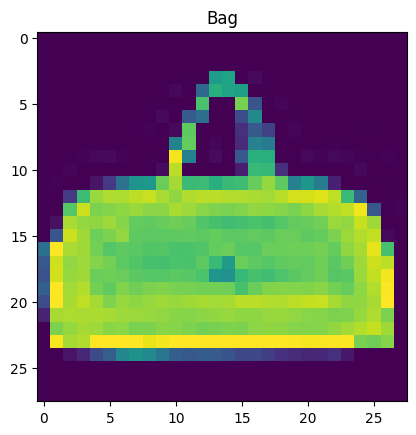

In [73]:
plt.imshow(image.squeeze())
plt.title(class_names[pred_classes_loaded]);